In [13]:
import matplotlib.pyplot as plt
import datetime
import tilemapbase as tmb
from pathlib import Path
import numpy as np

from pluma.preprocessing.resampling import resample_temporospatial
from pluma.preprocessing.ecg import heartrate_from_ecg
from pluma.export.ogcapi.features import export_geoframe_to_geojson
from pluma.export.ogcapi.records import DatasetRecord, RecordProperties, Contact
from pluma.stream.georeference import Georeference
from pluma.stream.ubx import _UBX_MSGIDS
from pluma.schema import Dataset
from FmulSchema import custom_schema
from helpers import *

## Notebook plotting
%matplotlib inline
plt.style.use('ggplot')

## Figure export parameters
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
import matplotlib as mpl
mpl.rcParams.update(new_rc_params)


# Set the paths to the dataset and build the dataset

Reloading EnableStreams...
Reloading DisableStreams...
Reloading ECG...


c:\git\emotional-cities\notebooks\.conda\lib\site-packages\pluma\io\harp.py:44: UserWarning: Harp stream file            @(WIN) --> I:\João\Exp_4-outdoor_experiment\Lansing_DownTownNatural_sub-OE109002_2023-09-10T195100Z\Streams_33 could not be found.
  warnings.warn(f'Harp stream file\


Reloading GSR...
Reloading Accelerometer...
Reloading DigitalIn...
Reloading Set...
Reloading Clear...
Reloading GPS_Latitude...
Reloading GPS_Longitude...
Reloading GPS_Altitude...
Reloading GPS_Data...
Reloading GPS_Time...
Reloading GPS_HasFix...
Reloading AirQuality_IAQIndex...
Reloading AirQuality_Temperature...
Reloading AirQuality_Humidity...
Reloading AirQuality_AirPressure...
Reloading SoundPressureLevel_SPL...
Reloading Humidity_Humidity...
Reloading AnalogIn_Voltage...
Reloading ParticulateMatter_PM1_0...


c:\git\emotional-cities\notebooks\.conda\lib\site-packages\pluma\io\harp.py:44: UserWarning: Harp stream file            @(WIN) --> I:\João\Exp_4-outdoor_experiment\Lansing_DownTownNatural_sub-OE109002_2023-09-10T195100Z\Streams_227 could not be found.
  warnings.warn(f'Harp stream file\
c:\git\emotional-cities\notebooks\.conda\lib\site-packages\pluma\io\harp.py:44: UserWarning: Harp stream file            @(WIN) --> I:\João\Exp_4-outdoor_experiment\Lansing_DownTownNatural_sub-OE109002_2023-09-10T195100Z\Streams_228 could not be found.
  warnings.warn(f'Harp stream file\
c:\git\emotional-cities\notebooks\.conda\lib\site-packages\pluma\io\harp.py:44: UserWarning: Harp stream file            @(WIN) --> I:\João\Exp_4-outdoor_experiment\Lansing_DownTownNatural_sub-OE109002_2023-09-10T195100Z\Streams_229 could not be found.
  warnings.warn(f'Harp stream file\
c:\git\emotional-cities\notebooks\.conda\lib\site-packages\pluma\io\harp.py:44: UserWarning: Harp stream file            @(WIN) --> I

Reloading ParticulateMatter_PM2_5...
Reloading ParticulateMatter_PM10_0...
Reloading Dual0_20mA_SolarLight...
Reloading Thermocouple_Temperature...
Reloading PTC_AirTemp...
Reloading NorthWind...
Reloading EastWind...
Reloading GustWind...
Reloading AirTemperature...
Reloading XOrientation...
Reloading YOrientation...
Reloading NullValue...
Reloading Accelerometer...
Reloading Empatica...


c:\git\emotional-cities\notebooks\.conda\lib\site-packages\pluma\io\empatica.py:55: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stream_id = empatica_stream['Message'][0].split(' ')[0]
c:\git\emotional-cities\notebooks\.conda\lib\site-packages\pluma\io\empatica.py:55: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stream_id = empatica_stream['Message'][0].split(' ')[0]
c:\git\emotional-cities\notebooks\.conda\lib\site-packages\pluma\io\empatica.py:55: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFram

Reloading Audio...
Reloading BufferIndex...
Reloading UBX...
Reloading EEG...
@(WIN) --> I:\João\Exp_4-outdoor_experiment\Lansing_DownTownNatural_sub-OE109002_2023-09-10T195100Z\20230910205222_BenchmarkPupil.nedf
Reading file...
Header information has been correctly retrieved.
Attempting to automatically correct eeg timestamps to harp timestamps...
Done.
Reloading Counter_DecodedFrames...
Reloading Counter_RawFrames...
Reloading Counter_IMU...
Reloading Counter_Gaze...
Reloading Counter_Audio...
Reloading Counter_Key...


c:\git\emotional-cities\notebooks\.conda\lib\site-packages\pluma\io\harp.py:44: UserWarning: Harp stream file            @(WIN) --> I:\João\Exp_4-outdoor_experiment\Lansing_DownTownNatural_sub-OE109002_2023-09-10T195100Z\Streams_211 could not be found.
  warnings.warn(f'Harp stream file\
c:\git\emotional-cities\notebooks\.conda\lib\site-packages\pluma\io\harp.py:44: UserWarning: Harp stream file            @(WIN) --> I:\João\Exp_4-outdoor_experiment\Lansing_DownTownNatural_sub-OE109002_2023-09-10T195100Z\Streams_213 could not be found.
  warnings.warn(f'Harp stream file\
c:\git\emotional-cities\notebooks\.conda\lib\site-packages\pluma\io\harp.py:44: UserWarning: Harp stream file            @(WIN) --> I:\João\Exp_4-outdoor_experiment\Lansing_DownTownNatural_sub-OE109002_2023-09-10T195100Z\Streams_214 could not be found.
  warnings.warn(f'Harp stream file\


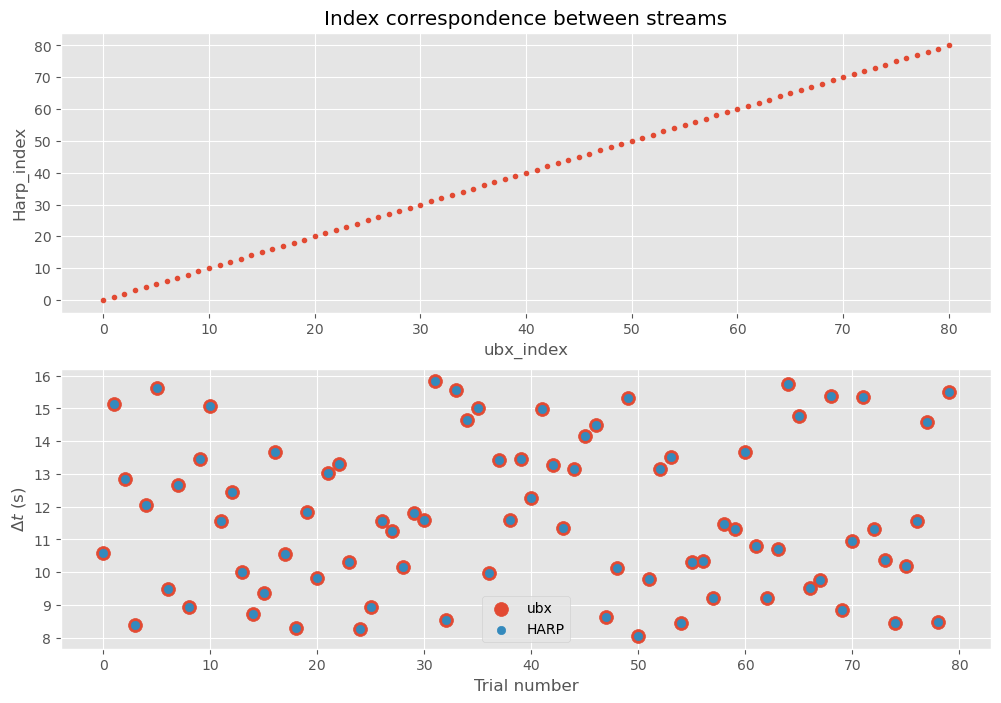

Dataset: <pluma.schema.Dataset object at 0x00000259873FF5B0> loaded successfully, and sucessfully calibrated.


c:\git\emotional-cities\notebooks\.conda\lib\site-packages\pluma\stream\ubx.py:74: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  reference = self.data["TIM_TM2"].Message[0]


In [14]:
# Path to the dataset. Can be local or remote.
# dataset_root = r"C:\Users\gonca\NeuroGEARS Ltd\Emotional Cities - Documents\Experiment Control and Acquisition\Datasets"
# # root = r"\Lansing\DownTownUrban\Lansing_DownTownUrban_sub-OE822001_2023-09-08T141128Z"
# root = r"\Lansing\DownTownNatural\Lansing_DownTownNatural_sub-OE825001_2023-09-08T173218Z"
dataset_root = r"I:\João\Exp_4-outdoor_experiment"
root = r"\Lansing_DownTownNatural_sub-OE109002_2023-09-10T195100Z"

dataset = load_dataset(f"{dataset_root}{root}", schema=custom_schema)
print(f"Dataset: {dataset} loaded successfully, and {'not' if not dataset.has_calibration else 'sucessfully'} calibrated." )

## Export to SDI geoframe

In [3]:
gdf = dataset.to_geoframe(rereference_to_ubx_time=True)

Failed Stream Harp stream from device 		TK, stream GPS_Latitude(227): Input dataframe is empty.
Failed Stream Harp stream from device 		TK, stream GPS_Longitude(228): Input dataframe is empty.
Failed Stream Harp stream from device 		TK, stream GPS_Altitude(229): Input dataframe is empty.
Failed Stream Harp stream from device 		TK, stream GPS_HasFix(232): Input dataframe is empty.
Failed Stream EEG stream from device Enobio, stream EEG: resample() takes 1 positional argument but 2 were given


## Dataset structure
The Dataset class follows the following structure:
```
Dataset/
├─ rootfolder
├─ datasetlabel
├─ streams/
├─ georeference/
```

 - `rootfolder` and `datasetlabel` are properties that store the location and label of the dataset, respectively.
 - `streams` is a `DotMap` structure with the initialized schema and, if loaded, all the data. The data of each stream can be generally accessed using `dataset.Stream.data`. Additionally, the Streams can be easily navigated using the "." (dot) notation to access different, potentially nested, relevant fields.
 - `georeference` stores the DataFrame necessary to "geotag" sensor data (*i.e.* to cross-reference in time)

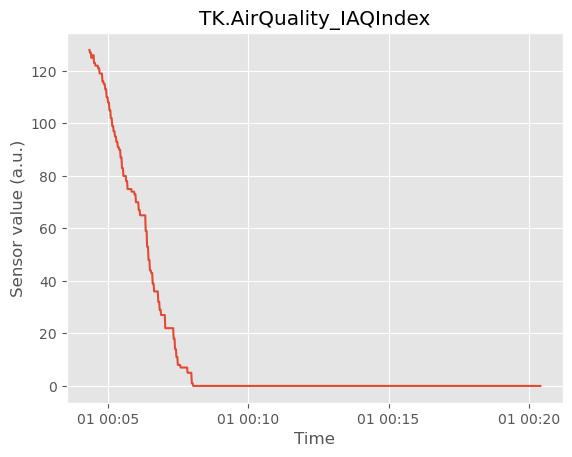

In [15]:
# For simplicity a general method can be used to attempt to plot the data inside a stream:
plot_stream(dataset.streams.TK.AirQuality.IAQIndex)

## Visualization:

We are not in a position where we can visualize data in both time and space. The following cells will demo this affordance.

In [16]:
# The first time you run tilemapbase library, you will need to initiate a cache structure
# Initialize tilemapbase cache (run this only once)
if True:
    import tilemapbase as tmb
    tmb.init(create=True)
plot_kwargs = {
    'markersize': 5,
    'to_aspect': (4/30),
    'figsize': (10,10),
    'tiles': tmb.tiles.build_OSM()
}

c:\git\emotional-cities\notebooks\src\poc-v1\Benchmarks\FmulDataset\helpers.py:69: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


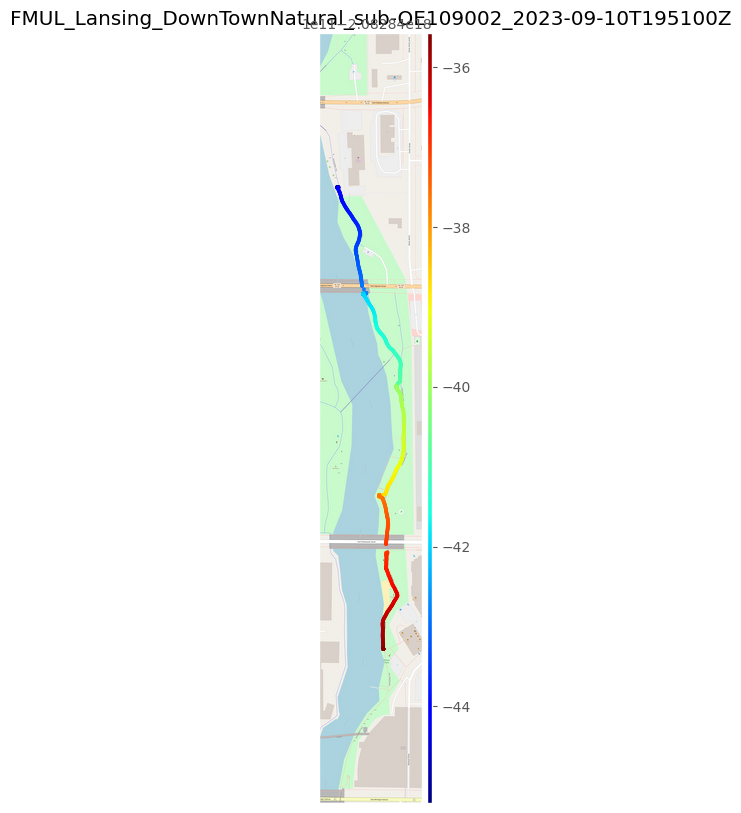

In [17]:
# First we will plot the spatial data colorcoded by time
plot_path(dataset, **plot_kwargs)

c:\git\emotional-cities\notebooks\.conda\lib\site-packages\pluma\preprocessing\resampling.py:35: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  resampled['Data'].iloc[i] = (input_data[
c:\git\emotional-cities\notebooks\.conda\lib\site-package

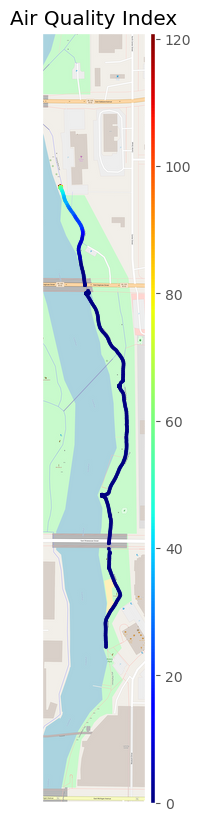

In [18]:
# plot resampled data in time and space using a dataset georeference. By default, it resamples the data to 2s bins
resampled = resample_temporospatial(dataset.streams.TK.AirQuality.IAQIndex.data, dataset.georeference)
plot_geospatial(resampled, **plot_kwargs, title='Air Quality Index')

c:\git\emotional-cities\notebooks\.conda\lib\site-packages\pluma\preprocessing\resampling.py:35: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  resampled['Data'].iloc[i] = (input_data[
c:\git\emotional-cities\notebooks\.conda\lib\site-package

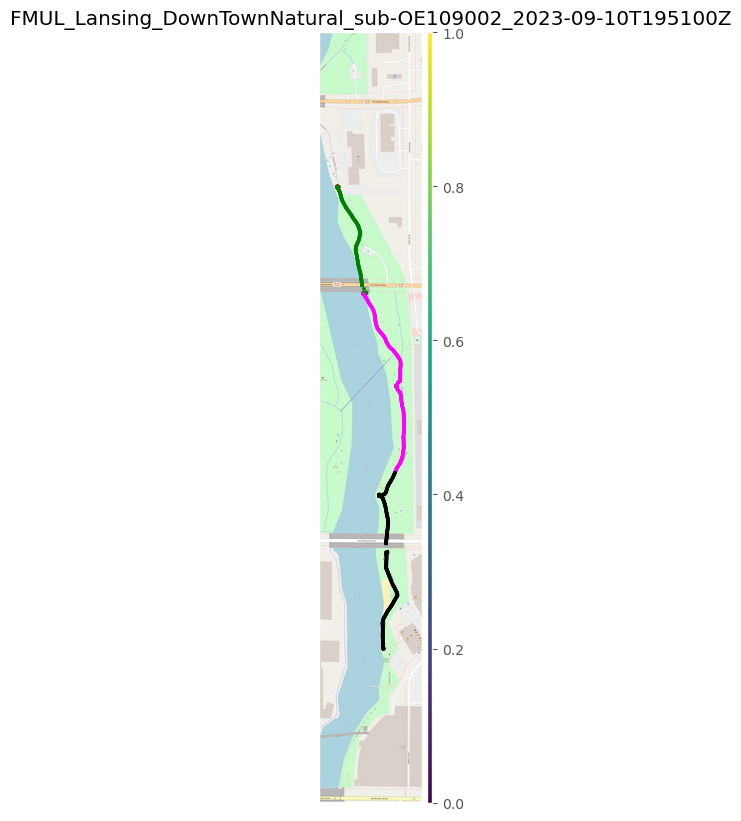

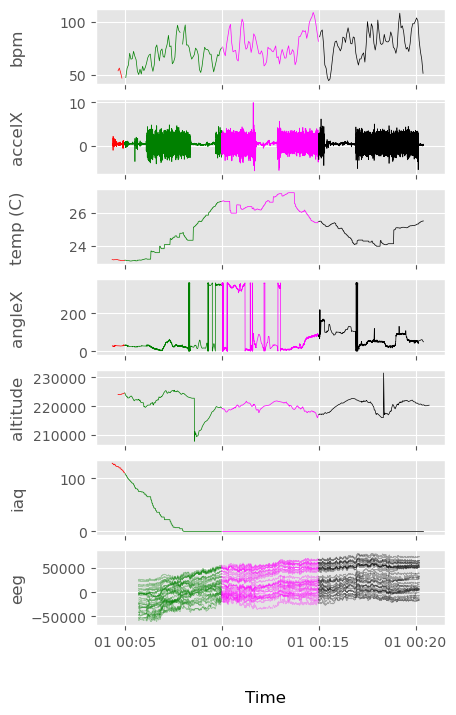

In [19]:
# Sometimes additional preprocessing might be required. As an example, when calculating heart rate from the ECG raw signal.
from pluma.preprocessing.ecg import heartrate_from_ecg

hr,_ = heartrate_from_ecg(dataset.streams.BioData.ECG,
                                         fs = 250, max_heartrate_bpm = 250.0,
                                        peak_height = 800, smooth_win = 10) ## Calculates HR from ecg raw signal
resampled = resample_temporospatial(hr, dataset.georeference,
                                    sampling_dt = datetime.timedelta(seconds = 4)) #Resample

segment_colors = np.array(['red', 'green', 'magenta', 'black', 'blue'])
hr_kwargs = { **plot_kwargs, 'cmap': 'brg', 'markersize': 10 }

# marker_segments = eeg_segments(dataset)
marker_segments = periodic_segments(dataset).iloc[:-1]

path_segments = marker_segments.reindex(dataset.georeference.elevation.index, method='pad')
plot_path(dataset, colorscale_override=segment_colors[path_segments.MarkerIdx], **plot_kwargs)

segments = [(x, segment_colors[idx % len(segment_colors)])
            for (x, idx) in marker_segments.reset_index().values]

traces = {
    'bpm': resampled.Data,
    'accelX': dataset.streams.Accelerometer.data["Accl_X"],
    'temp (C)': dataset.streams.TK.AirQuality.Temperature.data/100,
    'angleX': dataset.streams.Accelerometer.data["Orientation_X"],
    'altitude': dataset.georeference.elevation,
    'iaq': dataset.streams.TK.AirQuality.IAQIndex.data,
    'eeg': dataset.streams.EEG.data
}

plot_traces(traces, segments, figsize=(4.5,8))

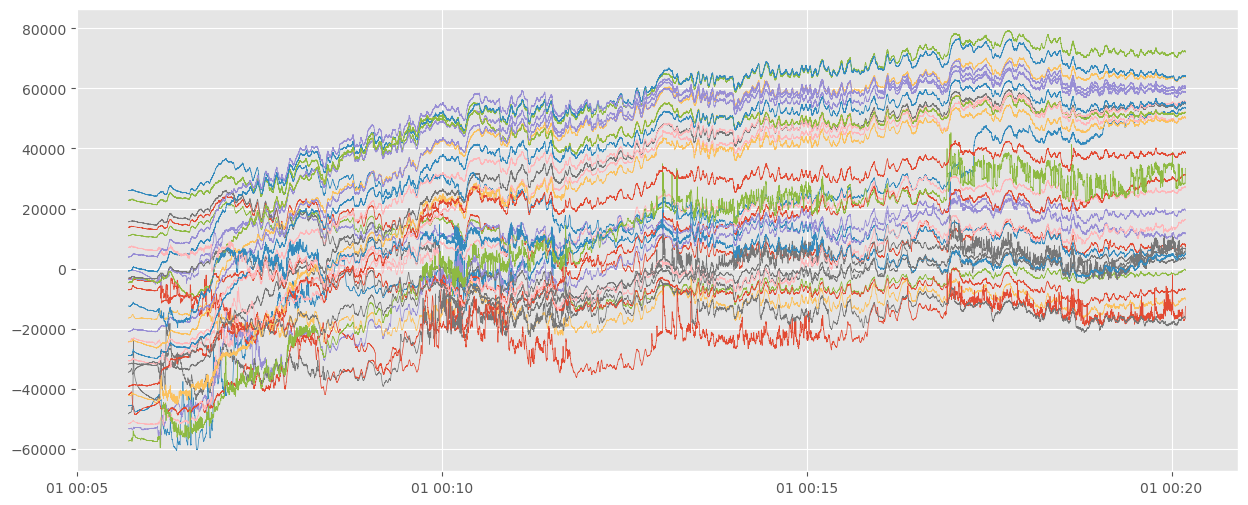

In [20]:
# Raw EEG traces
plt.figure(figsize=(15,6))
eeg_data = dataset.streams.EEG.data
plt.plot(eeg_data.np_time, eeg_data.np_eeg, lw = 0.5)
plt.show()

In [ ]:
# load and reindex pupil gaze data
gaze = load_pupilgaze(dataset)
vgaze = reindex_pupilgaze(dataset, gaze)
video = load_pupilvideo(dataset)
vgaze

In [ ]:
## Comparison of HR given by Empatica and raw ECG signal:
plt.figure(figsize=(15,6))
plt.plot(hr, label = 'ECG')
plt.plot(dataset.streams.Empatica.data.E4_Hr['Value'], label = 'Empatica')
plt.xlabel("Time")
plt.ylabel("HR(bpm)")
plt.legend()
plt.show()

In [ ]:
dataset.streams.Empatica.data.R

In [ ]:
## Export streams to csv
dataset.streams.TK.AirQuality.Temperature.export_to_csv("root")
